# Hand writing Digit Classification
This is multiclass classification problem


## Insights of data
- Each image is 28 X 28 Pixels
- Each Image is of 784 Pixel
- There are 700000 rows in dataset and each rows has 1 Image -> `mean There inside each row we have 28 columns and 28 rows `
- Because my image is in the form of dataframe of 28X28 so I do have to convert his in a single row so that my neural network can easily interpret thats why I have used flatted


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


# Tensorflow
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Flatten
from keras.datasets import mnist
from keras.callbacks import EarlyStopping # to stop without completing all epochs
from keras.layers import Dropout

from sklearn.metrics import accuracy_score # to check accuracy
import datetime

In [24]:
dataset = mnist.load_data()
(X_train,y_train) , (X_test,y_test) = dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [25]:
X_train[0].shape

(28, 28)

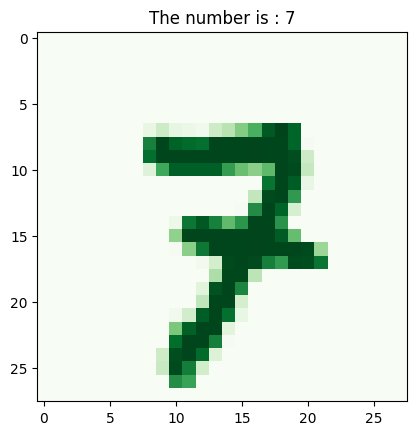

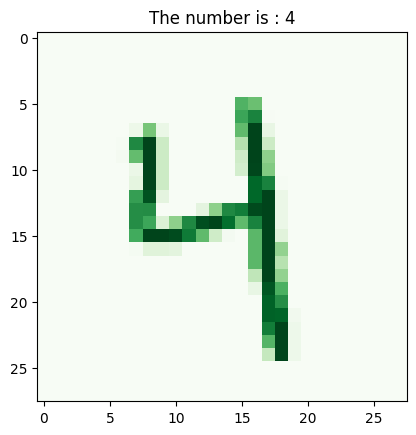

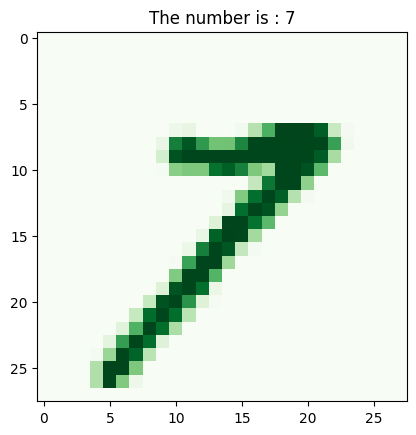

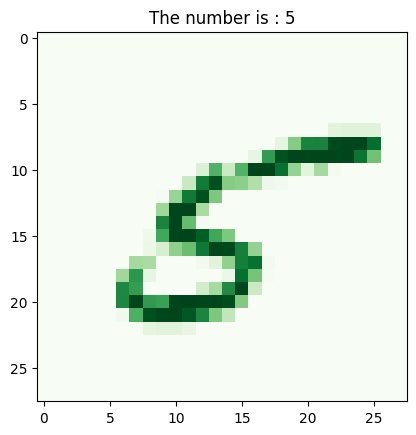

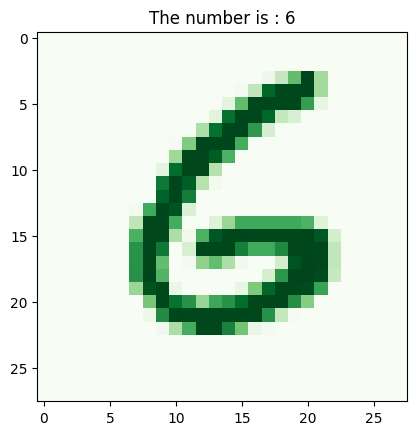

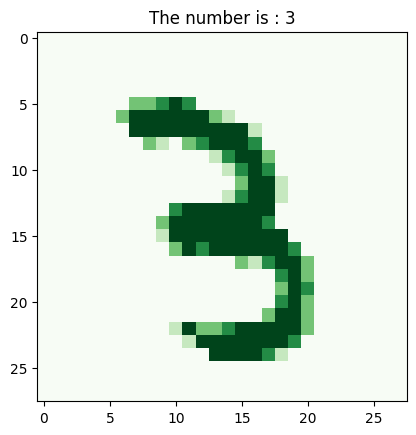

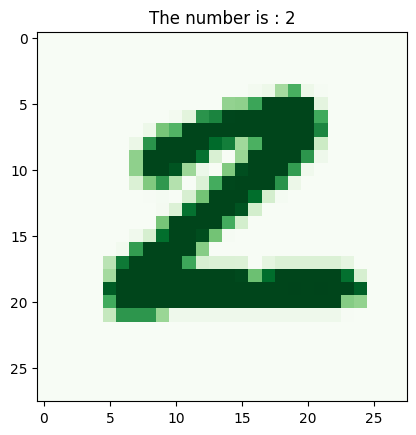

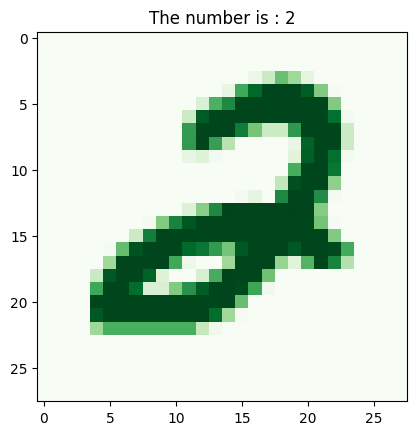

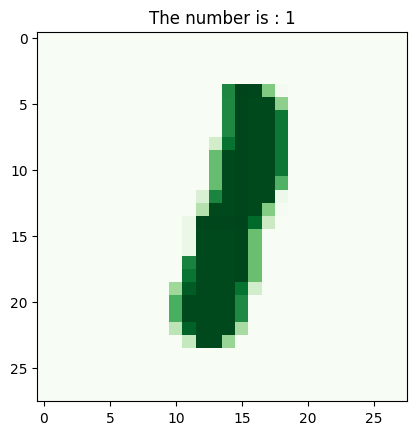

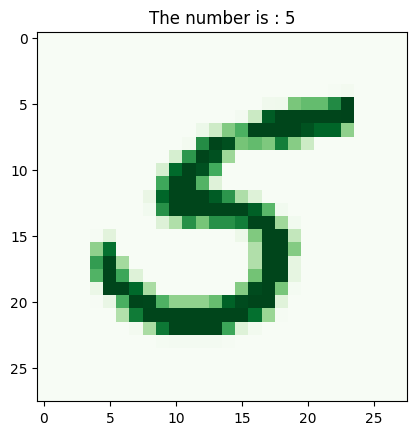

In [26]:
for i in np.random.randint(0,2000,10):
    number = y_train[i]
    plt.imshow(X_train[i],cmap='Greens')
    plt.title(f'The number is : {number}')
    plt.show()

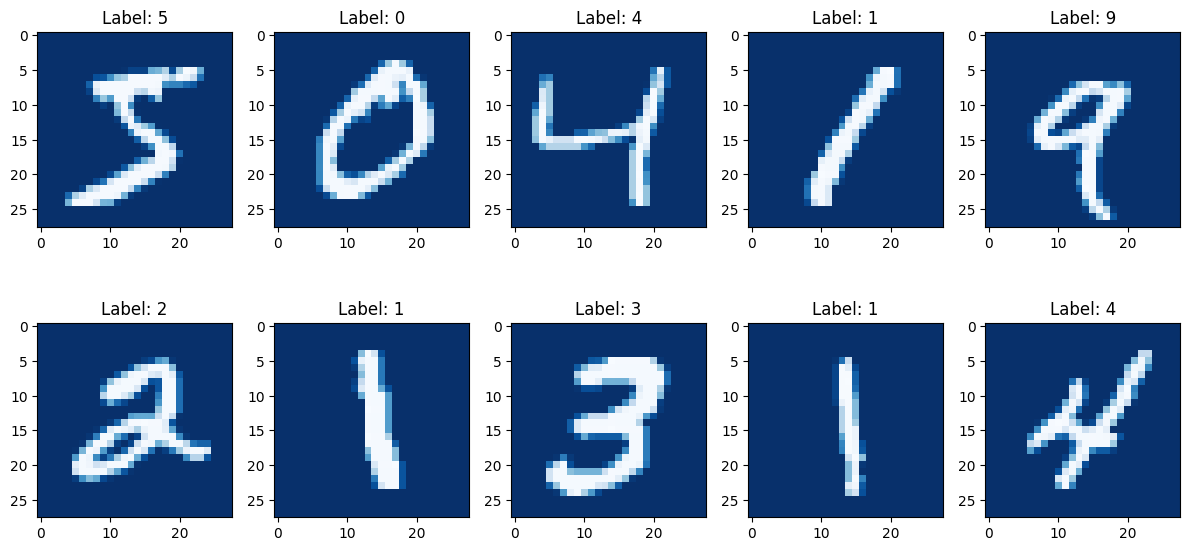

In [27]:

images = X_train[:10]
labels = y_train[:10]
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col,figsize=(12,6))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='Blues_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()


### Because it good to always have values in similar range in neural network I am transforming all values in range of -[0,1]


In [28]:
X_train = X_train/255
X_test = X_test/255

In [29]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Visualization after scaling

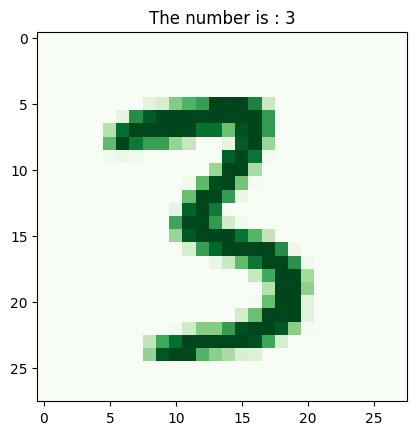

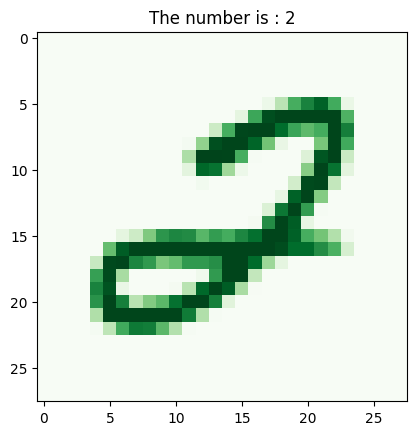

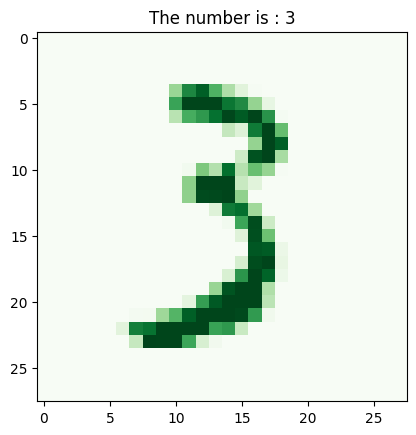

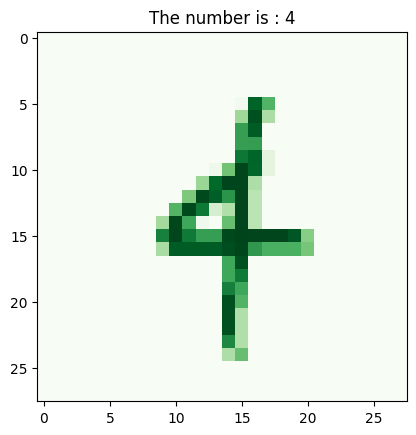

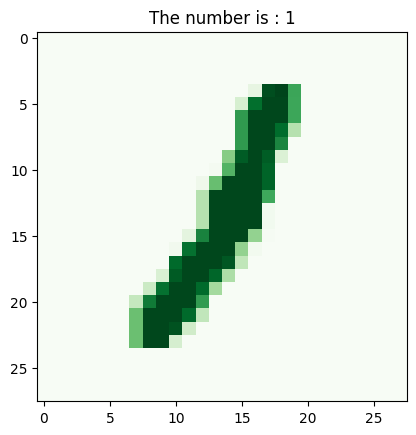

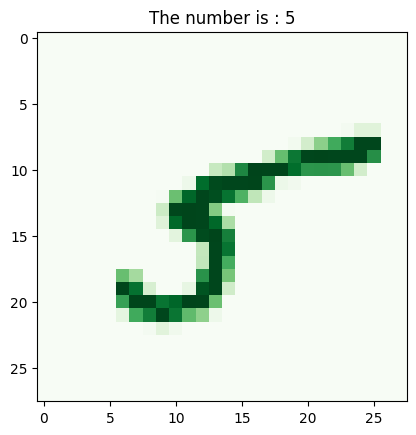

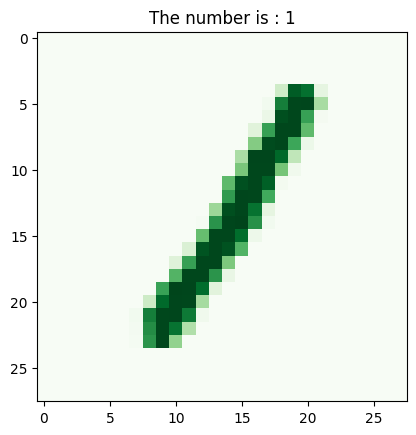

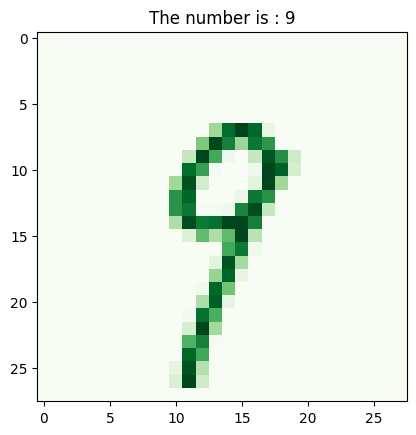

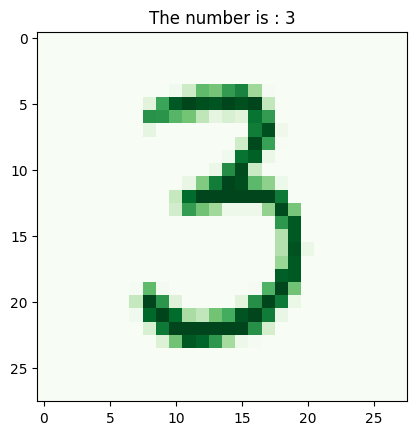

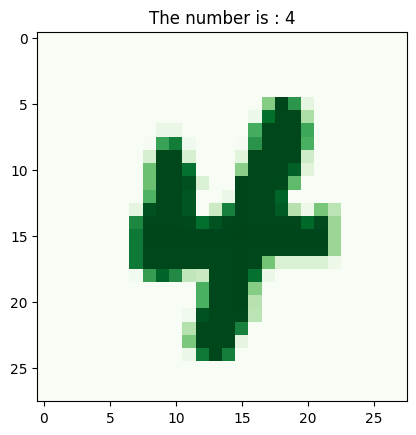

In [30]:
for i in np.random.randint(0,2000,10):
    number = y_train[i]
    plt.imshow(X_train[i],cmap='Greens')
    plt.title(f'The number is : {number}')
    plt.show()

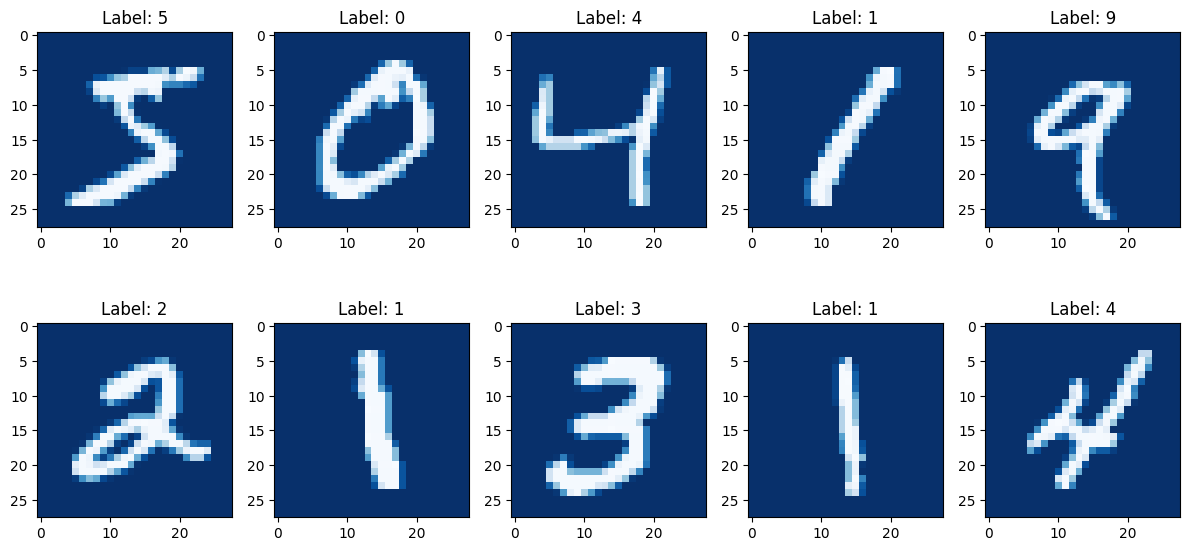

NOTHING HAS CHANGED


In [31]:

images = X_train[:10]
labels = y_train[:10]
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col,figsize=(12,6))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='Blues_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()
print('nothing has changed'.upper())

# Model Training

In [32]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Flatted will return a single row of 784 columns
model.add(Dense(128,activation ='relu')) # In this layer I have 128 nodes 
model.add(Dropout(0.5)) # to reduce overfitting
model.add(Dense(52,activation ='relu')) # In this layer I have 52 nodes and the activation 'elu' is upgraded version of 'relu'
model.add(Dropout(0.5)) # To reduce overfitting
model.add(Dense(32,activation ='relu')) # In this layer I have 128 nodes and the activation 'elu' is upgraded version of 'relu'
model.add(Dense(10,activation = 'softmax')) # Here I have 10 nodes because I have 10 output classes and activation 'softmax' is used for multiclass classification

In [33]:
print(model.summary())
print('\n','=='*27)
print('\n')
print(f'for dense_15 the parameters are {784*128+128} because I am giving 784 inputs and there are 128 biases so the weights are {784*128}')
print(f'And dense_16 have {128*10+10} parameters because I there are {128*10} weights and 10 Biases for this layer')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 52)                6708      
                                                                 
 dropout_3 (Dropout)         (None, 52)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                1696      
                                                                 
 dense_11 (Dense)            (None, 10)               

In [34]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics = 'accuracy')
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2
                    ,callbacks=callback
                    )

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7522 - accuracy: 0.7606 - val_loss: 0.2353 - val_accuracy: 0.9336
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3942 - accuracy: 0.8879 - val_loss: 0.1828 - val_accuracy: 0.9482
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3338 - accuracy: 0.9075 - val_loss: 0.1590 - val_accuracy: 0.9560
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2958 - accuracy: 0.9175 - val_loss: 0.1464 - val_accuracy: 0.9602
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2661 - accuracy: 0.9251 - val_loss: 0.1330 - val_accuracy: 0.9620
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2540 - accuracy: 0.9297 - val_loss: 0.1251 - val_accuracy: 0.9660
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2369 - accuracy: 0.9327 - val_loss: 0.1294 - val_accuracy:

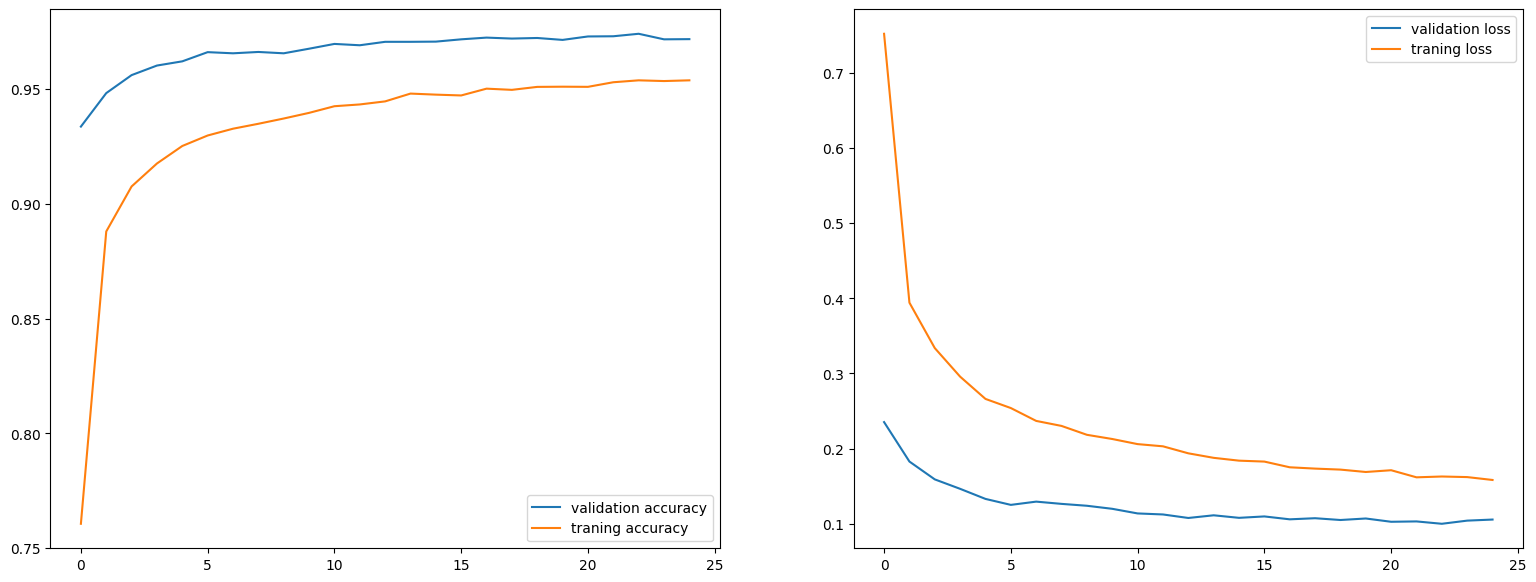

In [36]:
plt.subplots(nrows=1,ncols=2,figsize = (19,7))
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['validation accuracy','traning accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['validation loss','traning loss'])

In [37]:
y_probab = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [38]:
y_probab.shape

(10000, 10)

In [39]:
y_pred = y_probab.argmax(axis=1)

In [40]:
y_pred.shape

(10000,)

In [41]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.971

## Testing my Model

1/1 [==============================] - 0s 45ms/step


Text(0.5, 1.0, 'the predicted value of number is [7]')

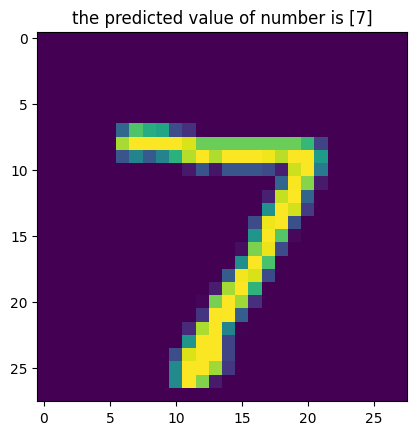

In [42]:
plt.imshow(X_test[0])
plt.title(f'the predicted value of number is {model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)}')

1/1 [==============================] - 0s 52ms/step


Text(0.5, 1.0, 'the predicted value of number is [8]')

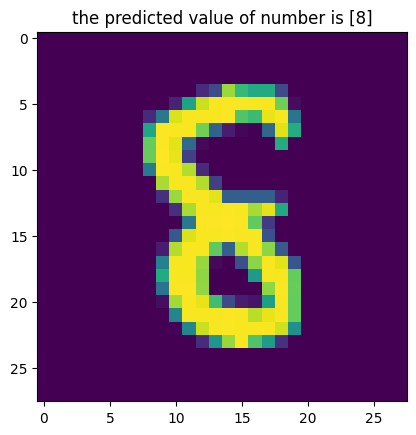

In [43]:
plt.imshow(X_test[232])
plt.title(f'the predicted value of number is {model.predict(X_test[232].reshape(1,28,28)).argmax(axis = 1)}')

1/1 [==============================] - 0s 42ms/step


Text(0.5, 1.0, 'the predicted value of number is [9]')

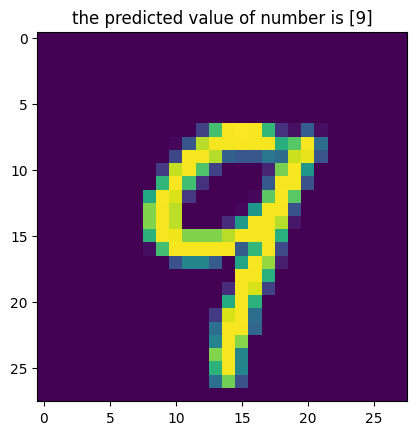

In [44]:
plt.imshow(X_test[12])
plt.title(f'the predicted value of number is {model.predict(X_test[12].reshape(1,28,28)).argmax(axis = 1)}')

1/1 [==============================] - 0s 43ms/step


Text(0.5, 1.0, 'the predicted value of number is [3]')

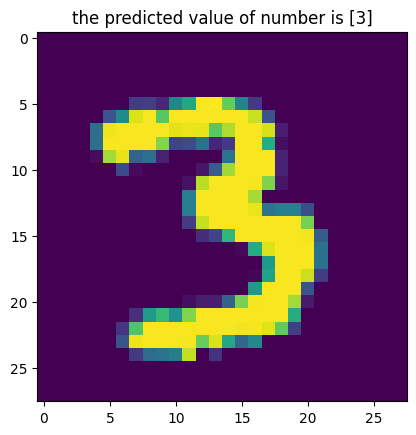

In [45]:
plt.imshow(X_test[500])
plt.title(f'the predicted value of number is {model.predict(X_test[500].reshape(1,28,28)).argmax(axis = 1)}')

1/1 [==============================] - 0s 51ms/step


Text(0.5, 1.0, 'the predicted value of number is [8]')

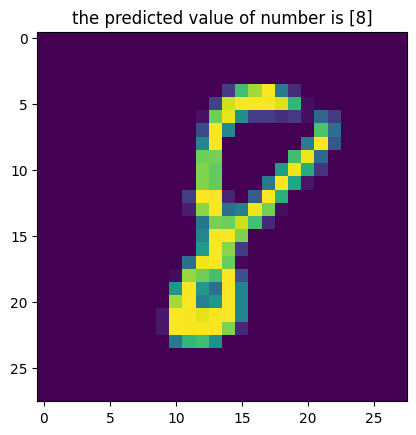

In [46]:
plt.imshow(X_test[520])
plt.title(f'the predicted value of number is {model.predict(X_test[520].reshape(1,28,28)).argmax(axis = 1)}')

## Tensorboard

In [47]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Flatted will return a single row of 784 columns
model.add(Dense(128,activation ='relu')) # In this layer I have 128 nodes 
model.add(Dense(10,activation = 'softmax')) # Here I have 10 nodes because I have 10 output classes and activation 'softmax' is used for multiclass classification



In [48]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [49]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics = 'accuracy')
history = model.fit(X_train,y_train,epochs=15,validation_split=0.2
                    ,callbacks=[callback,tensorboard_callback]
                    )

Epoch 1/15
1500/1500 [==============================] - 10s 5ms/step - loss: 0.2857 - accuracy: 0.9185 - val_loss: 0.1500 - val_accuracy: 0.9577
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1282 - accuracy: 0.9626 - val_loss: 0.1233 - val_accuracy: 0.9637
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0880 - accuracy: 0.9733 - val_loss: 0.1099 - val_accuracy: 0.9688
Epoch 4/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.0994 - val_accuracy: 0.9702
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0927 - val_accuracy: 0.9724
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0873 - val_accuracy: 0.9751
Epoch 7/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0308 - accuracy: 0.9914 - val_loss: 0.0873 - val_accuracy